In [87]:
import torch
import matplotlib.pyplot as plt

## Linear Regression

In [88]:
x = torch.tensor([12.4,14.3,14.5,14.9,16.1,16.9,16.5,15.4,17.0,17.9,18.8,20.3,22.4,19.4,15.5,16.7,17.3,18.4,19.2,17.4,19.5,19.7,21.2])
y = torch.tensor([11.2,12.5,12.7,13.1,14.1,14.8,14.4,13.4,14.9,15.6,16.4,17.7,19.6,16.9,14.0,14.6,15.1,16.1,16.8,15.2,17.0,17.2,18.6])

b = torch.rand([1], requires_grad= True)
w = torch.rand([1], requires_grad= True)
print('b: ', b)
print('w: ', w)

b:  tensor([0.8463], requires_grad=True)
w:  tensor([0.2501], requires_grad=True)


w = tensor([0.6091], requires_grad=True), b = tensor([0.8665], requires_grad=True), loss =103.75968933105469
w = tensor([0.7444], requires_grad=True), b = tensor([0.8741], requires_grad=True), loss =14.746423721313477
w = tensor([0.7953], requires_grad=True), b = tensor([0.8770], requires_grad=True), loss =2.1070754528045654
w = tensor([0.8146], requires_grad=True), b = tensor([0.8780], requires_grad=True), loss =0.3123640716075897
w = tensor([0.8218], requires_grad=True), b = tensor([0.8784], requires_grad=True), loss =0.0575251579284668
w = tensor([0.8245], requires_grad=True), b = tensor([0.8785], requires_grad=True), loss =0.02133917063474655
w = tensor([0.8256], requires_grad=True), b = tensor([0.8786], requires_grad=True), loss =0.016200756654143333
w = tensor([0.8259], requires_grad=True), b = tensor([0.8786], requires_grad=True), loss =0.01547095738351345
w = tensor([0.8261], requires_grad=True), b = tensor([0.8786], requires_grad=True), loss =0.015367087908089161
w = tensor([0

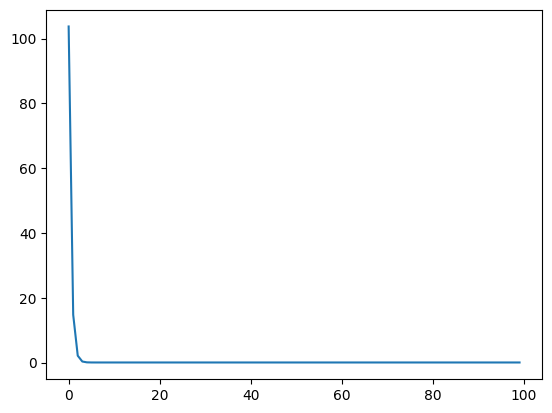

In [89]:
learning_rate = torch.tensor(0.001)
loss_list = []

for epoch in range(100):
    loss = 0.0
    for i in range(len(x)):
        y_p = w*x[i] + b
        loss += (y_p - y[i])**2
    loss = loss / len(x)
    # print('loss: ', loss.item())
    loss_list.append(loss.item())
    
    loss.backward()
    with torch.no_grad():
        w -= learning_rate* w.grad
        b -= learning_rate* b.grad
    w.grad.zero_()
    b.grad.zero_()
    print(f'w = {w}, b = {b}, loss ={loss.item()}')

plt.plot(loss_list)
plt.show()
    

2. Find the value of w.grad, b.grad using analytical solution for the given linear regression 
problem. Initial value of w = b =1. Learning parameter is set to 0.001. Implement the same 
and verify the values of w.grad , b.grad and updated parameter values for two epochs. 
Consider the difference between predicted and target values of y is defined as (yp-y)

In [90]:
import numpy as np
inp_x = np.array([2,4])
inp_y = np.array([20,40])

x = torch.tensor(inp_x)
y = torch.tensor(inp_y)
w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)
learning_rate = torch.tensor(0.001)
loss_list = []

for epoch in range(2):
    loss = 0.0
    for j in range(len(x)):
        y_p = w*x[j] + b
        loss += (y_p - y[j])**2
    loss = loss/len(x)
    loss_list.append(loss.item())
    loss.backward()
    
    with torch.no_grad():
        w -= learning_rate* w.grad
        b -= learning_rate* b.grad
    print(f'w = {w}, b = {b}, loss ={loss.item()}')

w = 1.1740000247955322, b = 1.0520000457763672, loss =757.0
w = 1.5182080268859863, b = 1.154852032661438, loss =724.3797607421875


In [91]:
def analytical(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    numer = np.sum((x-x_mean)* (y-y_mean))
    denom = np.sum((x-x_mean)**2)
    w = numer/denom
    b = y_mean - w*x_mean
    print(f'w = {w}, b = {b}')
    
analytical(inp_x,inp_y)

w = 10.0, b = 0.0


3. Revise the linear regression model by defining a user defined class titled RegressionModel
with two parameters w and b as its member variables. Define a constructor to initialize w 
and b with value 1. Define four member functions namely forward(x) to implement wx+b, 
update() to update w and b values, reset_grad() to reset parameters to zero, criterion(y, yp) 
to implement MSE Loss given the predicted y value yp and the target label y. Define an 
object of this class named model and invoke all the methods. Plot the graph of epoch vs 
loss by varying epoch to 100 iterations. 
x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])

In [92]:
x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])
learning_rate = torch.tensor(0.001)

In [93]:
class LinearRegression:
    def __init__(self):
        self.w = torch.ones([1], requires_grad=True)
        self.b = torch.ones([1], requires_grad=True)
    def forward(self,x):
        return self.w * x + self.b
    def update(self):
        self.w -= learning_rate * self.w.grad
        self.b -= learning_rate * self.b.grad
    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()
    def criterion(self,yj,yp):
        return (yj-yp)**2

w = 1.5182080268859863, b = 1.154852032661438, loss =25359.80078125
w = 1.5182080268859863, b = 1.154852032661438, loss =10952.734375
w = 1.5182080268859863, b = 1.154852032661438, loss =4889.1201171875
w = 1.5182080268859863, b = 1.154852032661438, loss =2337.07373046875
w = 1.5182080268859863, b = 1.154852032661438, loss =1262.96875
w = 1.5182080268859863, b = 1.154852032661438, loss =810.8944702148438
w = 1.5182080268859863, b = 1.154852032661438, loss =620.6205444335938
w = 1.5182080268859863, b = 1.154852032661438, loss =540.5318603515625
w = 1.5182080268859863, b = 1.154852032661438, loss =506.8174743652344
w = 1.5182080268859863, b = 1.154852032661438, loss =492.6212463378906
w = 1.5182080268859863, b = 1.154852032661438, loss =486.63970947265625
w = 1.5182080268859863, b = 1.154852032661438, loss =484.11553955078125
w = 1.5182080268859863, b = 1.154852032661438, loss =483.04638671875
w = 1.5182080268859863, b = 1.154852032661438, loss =482.589599609375
w = 1.5182080268859863, b

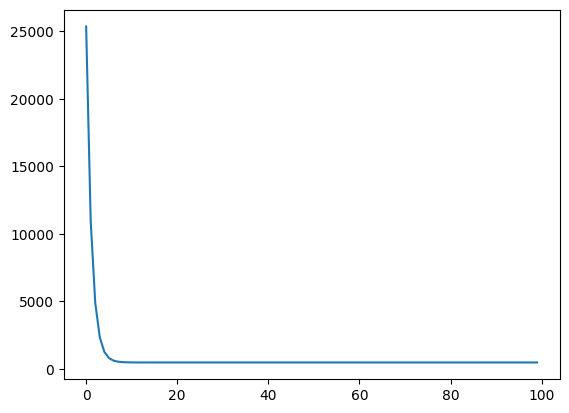

In [94]:
model = LinearRegression()
loss_list = []
for epoch in range(100):
    loss = 0.0
    for j in range(len(x)):
        y_p = model.forward(x[j])
        loss += model.criterion(y[j], y_p)
    loss = loss / len(x)
    loss_list.append(loss.item())
    loss.backward()
    
    with torch.no_grad():
        model.update()
    model.reset_grad()
    print(f'w = {w}, b = {b}, loss ={loss.item()}')
plt.plot(loss_list)
plt.show()

4. Convert your program written in Qn 3 to extend nn.module in your model. Also override 
the necessary methods to fit the regression line. Illustrate the use of Dataset and DataLoader
from torch.utils.data in your implementation. Use the SGD Optimizer torch.optim.SGD()

In [95]:
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [96]:
x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])

In [97]:
class MyDataset(Dataset):
    def __init__(self,X,Y):
        self.x = X
        self.y = Y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [98]:
class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel,self).__init__()
        self.w = nn.Parameter(torch.rand([1]))
        self.b = nn.Parameter(torch.rand([1], requires_grad=True))
    def forward(self,x):
        return self.w*x + self.b
    

In [99]:
dataset = MyDataset(x,y)
data_loader = DataLoader(dataset)
loos_fn = nn.MSELoss()
model = RegressionModel()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

epoch 0 = The parameters are w=4.89801549911499, b=0.7659345269203186 and loss=27383.666015625
epoch 10 = The parameters are w=12.799810409545898, b=1.3447904586791992 and loss=488.7427673339844
epoch 20 = The parameters are w=12.901752471923828, b=1.387523889541626 and loss=483.9251403808594
epoch 30 = The parameters are w=12.90069580078125, b=1.4230544567108154 and loss=483.79827880859375
epoch 40 = The parameters are w=12.898286819458008, b=1.4583672285079956 and loss=483.6728515625
epoch 50 = The parameters are w=12.895870208740234, b=1.4935553073883057 and loss=483.548583984375
epoch 60 = The parameters are w=12.893460273742676, b=1.5286201238632202 and loss=483.42486572265625
epoch 70 = The parameters are w=12.891058921813965, b=1.5635621547698975 and loss=483.3017578125
epoch 80 = The parameters are w=12.888666152954102, b=1.598381757736206 and loss=483.17999267578125
epoch 90 = The parameters are w=12.886281967163086, b=1.6330794095993042 and loss=483.05908203125


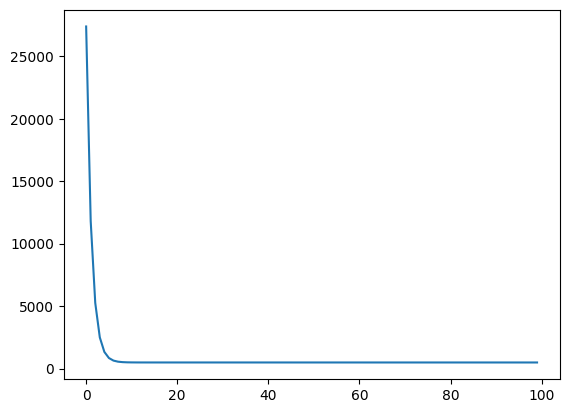

In [100]:
loss_list = []
for epoch in range(100):
    loss = 0.0
    optimizer.zero_grad()
    for x,y in data_loader:
        y_p = model.forward(x)
        loss += criterion(y_p, y)
    loss = loss/len(data_loader)
    loss.backward()
    optimizer.step()
    if(epoch%10 == 0):
        print("epoch {} = The parameters are w={}, b={} and loss={}".format(epoch,model.w.item(), model.b.item(), loss.item()))
    loss_list.append(loss.item())

plt.plot(loss_list)
plt.show()

5. Use PyTorch’s nn.Linear() in your implementation to perform linear regression for the data 
provided in Qn. 1. Also plot the graph.

In [109]:
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as F
import matplotlib as plt

In [110]:
class myDataset(Dataset):
    def __init__(self,x,y):
        self.x = x
        self.y = y 
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [111]:
class LinearRegression(F.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = F.Linear(in_features=1, out_features=1)
    def forward(self, x):
        return self.linear(x)

In [112]:
x = torch.tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4, 19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2])
y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6, 16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6])


In [113]:
dataset = myDataset(x,y)
data_loader = DataLoader(dataset)
model = LinearRegression()
criterion = F.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [114]:
import matplotlib.pyplot as plt

The parameters are w=0.22523486614227295, b=-0.5038589835166931 and loss=1007.5890502929688
The parameters are w=0.9017185568809509, b=-0.4654955267906189 and loss=0.026353735476732254
The parameters are w=0.9017395377159119, b=-0.4651713967323303 and loss=0.02633986435830593
The parameters are w=0.9017214775085449, b=-0.4648495316505432 and loss=0.02632957696914673
The parameters are w=0.9017033576965332, b=-0.46452778577804565 and loss=0.02631915919482708
The parameters are w=0.9016852974891663, b=-0.4642062187194824 and loss=0.026308756321668625
The parameters are w=0.9016671776771545, b=-0.4638846516609192 and loss=0.026298439130187035
The parameters are w=0.9016491174697876, b=-0.46356335282325745 and loss=0.026288045570254326
The parameters are w=0.9016310572624207, b=-0.4632420837879181 and loss=0.026277679949998856
The parameters are w=0.9016129970550537, b=-0.4629208743572235 and loss=0.026267314329743385


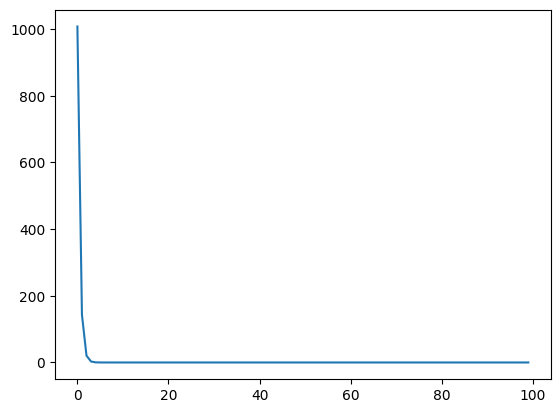

In [115]:
loss_list = []
for epoch in range(100):
    loss = 0.0
    optimizer.zero_grad()
    for x,y in data_loader:
        y_p = model.forward(x)
        loss += criterion(y_p, y)
    loss = loss / len(data_loader)
    loss.backward()
    optimizer.step()
    if(epoch%10 == 0):
         print("The parameters are w={}, b={} and loss={}".format(model.linear.weight.item(), model.linear.bias.item(), loss.item()))
    loss_list.append(loss.item())
    
plt.plot(loss_list)
plt.show()

6. Implement multiple linear regression for the data provided below
    Verify your answer for the data point X1=3, X2=2.

In [118]:
import torch
import torch.nn as F   
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt

In [119]:
x1 = torch.tensor([3,4,5,6,2])
x2 = torch.tensor([8,5,7,3,1])
y = torch.tensor([-3.7,3.5,2.5,11.5,5.7])

In [120]:
class MyDataset(Dataset):
    def __init__(self,x1,x2,y):
        self.x1 = x1
        self.x2 = x2
        self.y = y
    def __len__(self):
        return len(self.y)
    def __getitem__(self,idx):
        return self.x1[idx], self.x2[idx], self.y[idx]

In [131]:
class MultiRegression(F.Module):
    def __init__(self):
        super(MultiRegression, self).__init__()
        self.w1 = F.Parameter(torch.rand([1], requires_grad=True))
        self.w2 = F.Parameter(torch.rand([1], requires_grad=True))
        self.b = F.Parameter(torch.rand([1], requires_grad=True))
    def forward(self,x1,x2):
        return self.w1*x1 + self.w2*x2 + self.b

In [132]:
dataset = MyDataset(x1,x2,y)
data_loader = DataLoader(dataset, batch_size=2, shuffle=True)
loss_fn = F.MSELoss()
model = MultiRegression()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [133]:
loss_list = []
for epoch in range(100):
    loss = 0.0
    for i,data in enumerate(data_loader):
        x1,x2,y = data
        optimizer.zero_grad()
        y_pred = model(x1,x2)
        loss += loss_fn(y_pred, y)
        loss.backward()
        optimizer.step()
        loss += loss
    loss = loss / len(data_loader)
    loss_list.append(loss.item())
    print("After {} epochs, The parameters are w={},b={}, and loss ={}".format(epoch, model.w1.item(),model.w2.item(),model.b,loss.item()))


After 0 epochs, The parameters are w=0.5611004829406738,b=0.07100863754749298, and loss =Parameter containing:
tensor([0.2532], requires_grad=True)
After 1 epochs, The parameters are w=0.566279411315918,b=0.07748226076364517, and loss =Parameter containing:
tensor([0.2545], requires_grad=True)
After 2 epochs, The parameters are w=0.5710232853889465,b=0.08341209590435028, and loss =Parameter containing:
tensor([0.2557], requires_grad=True)
After 3 epochs, The parameters are w=0.5753686428070068,b=0.08884382992982864, and loss =Parameter containing:
tensor([0.2568], requires_grad=True)
After 4 epochs, The parameters are w=0.5793490409851074,b=0.09381929785013199, and loss =Parameter containing:
tensor([0.2578], requires_grad=True)
After 5 epochs, The parameters are w=0.5829950571060181,b=0.09837682545185089, and loss =Parameter containing:
tensor([0.2587], requires_grad=True)
After 6 epochs, The parameters are w=0.5863348245620728,b=0.10255151987075806, and loss =Parameter containing:
te

In [139]:
x1 = torch.tensor([4.0])
x2 = torch.tensor([5.0])

# Make predictions using the trained model
with torch.no_grad():
    y_pred = model(x1, x2)

print("Predicted output:", y_pred.item())

Predicted output: 3.4998908042907715


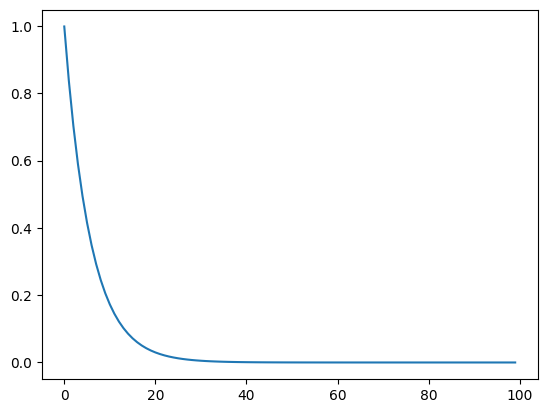

In [140]:
plt.plot(loss_list)
plt.show()

7. Implement logistic regression 
x = [1, 5, 10, 10, 25, 50, 70, 75, 100,]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

In [158]:
class MyDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.Y[i]

In [159]:
class LogisticRegression(F.Module):
    def __init__(self, in_dim, op_dim):
        super(LogisticRegression, self).__init__()
        self.linear = F.Linear(in_dim, op_dim)
        self.sigmoid = F.Sigmoid()
    def forward(self, x):
        x= self.linear(x)
        x = self.sigmoid(x)
        return x
        

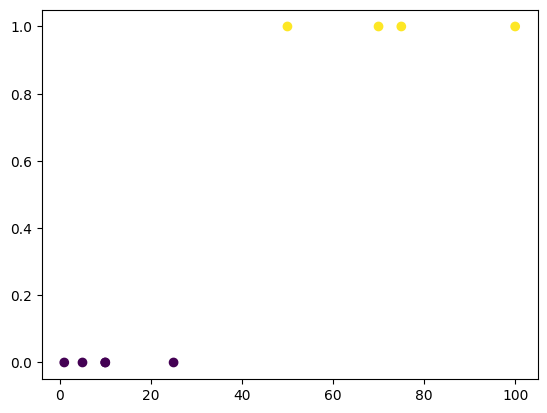

In [160]:
X = torch.tensor([1, 5, 10, 10, 25, 50, 70, 75, 100], dtype=torch.float32)
Y = torch.tensor([0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=torch.float32)
plt.scatter(X,Y, c=Y)
plt.show()

In [161]:
dataset = MyDataset(X, Y)
data_loader = DataLoader(dataset)
model = LogisticRegression(1,1)
criterion = F.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [162]:
loss_list = []
for epoch in range(1000):
    loss = 0.0
    optimizer.zero_grad()
    for x,y in data_loader:
        y_p = model(x)
        loss += criterion(y_p, y)
    loss = loss/len(data_loader)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())
    if(epoch%100 == 0):
        print('epoch: {} => w = {}, , b={}, loss ={}'.format(epoch , model.linear.weight.item(), model.linear.bias.item(), loss.item()))

epoch: 0 => w = -0.6248359084129333, , b=-0.640588641166687, loss =20.80828285217285
epoch: 100 => w = 0.04312973842024803, , b=-0.7585359215736389, loss =0.35998356342315674
epoch: 200 => w = 0.046897921711206436, , b=-0.9408866763114929, loss =0.3266497552394867
epoch: 300 => w = 0.05038876459002495, , b=-1.1078605651855469, loss =0.2987041175365448
epoch: 400 => w = 0.053656045347452164, , b=-1.2614375352859497, loss =0.2750656306743622
epoch: 500 => w = 0.05672089755535126, , b=-1.403324842453003, loss =0.25489094853401184
epoch: 600 => w = 0.05960294231772423, , b=-1.534979224205017, loss =0.23752325773239136
epoch: 700 => w = 0.062319882214069366, , b=-1.6576390266418457, loss =0.22244888544082642
epoch: 800 => w = 0.06488765776157379, , b=-1.7723597288131714, loss =0.20926399528980255
epoch: 900 => w = 0.06732045114040375, , b=-1.880039930343628, loss =0.19764862954616547


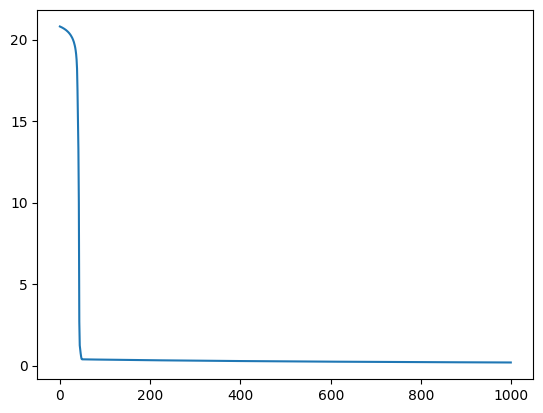

In [163]:
plt.plot(loss_list)
plt.show()